<a href="https://colab.research.google.com/github/alvinsenjaya/TomatoPlantDiseases/blob/master/Base_DenseNet121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Required Libraries**

In [0]:
import os
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# **Download Dataset**

In [0]:
os.environ['KAGGLE_USERNAME']="xxxxx"
os.environ['KAGGLE_KEY']="xxxxxxxxxxxxxxxxxxxxxx"

In [0]:
!kaggle datasets download noulam/tomato

 99% 737M/743M [00:06<00:00, 108MB/s]
100% 743M/743M [00:06<00:00, 114MB/s]


In [0]:
!unzip tomato.zip

# **Image Preprocessing**

In [0]:
TRAINING_DIR = '/content/New Plant Diseases Dataset(Augmented)/train/'
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

VALIDATION_DIR = '/content/New Plant Diseases Dataset(Augmented)/valid/'
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(256,256),
    class_mode='categorical',
    batch_size=128
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(256,256),
    class_mode='categorical',
    batch_size=128
)

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


# **Define Machine Learning Model**

In [0]:
base_model = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False, input_shape=(256,256,3))

print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  427


In [0]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name)

0 input_1
1 zero_padding2d
2 conv1/conv
3 conv1/bn
4 conv1/relu
5 zero_padding2d_1
6 pool1
7 conv2_block1_0_bn
8 conv2_block1_0_relu
9 conv2_block1_1_conv
10 conv2_block1_1_bn
11 conv2_block1_1_relu
12 conv2_block1_2_conv
13 conv2_block1_concat
14 conv2_block2_0_bn
15 conv2_block2_0_relu
16 conv2_block2_1_conv
17 conv2_block2_1_bn
18 conv2_block2_1_relu
19 conv2_block2_2_conv
20 conv2_block2_concat
21 conv2_block3_0_bn
22 conv2_block3_0_relu
23 conv2_block3_1_conv
24 conv2_block3_1_bn
25 conv2_block3_1_relu
26 conv2_block3_2_conv
27 conv2_block3_concat
28 conv2_block4_0_bn
29 conv2_block4_0_relu
30 conv2_block4_1_conv
31 conv2_block4_1_bn
32 conv2_block4_1_relu
33 conv2_block4_2_conv
34 conv2_block4_concat
35 conv2_block5_0_bn
36 conv2_block5_0_relu
37 conv2_block5_1_conv
38 conv2_block5_1_bn
39 conv2_block5_1_relu
40 conv2_block5_2_conv
41 conv2_block5_concat
42 conv2_block6_0_bn
43 conv2_block6_0_relu
44 conv2_block6_1_conv
45 conv2_block6_1_bn
46 conv2_block6_1_relu
47 conv2_block6_

In [0]:
base_model.trainable = True

fine_tune_at = 313
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [0]:
model = tf.keras.models.Sequential([
  base_model,
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 8, 8, 1024)        7037504   
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 1024)        0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               33554944  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 40,597,578
Trainable params: 35,720,202
Non-trainable params: 4,877,376
_________________________________________________________________


# **Define Learning Parameter**

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# **Begin Training**

In [0]:
history = model.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
144/144 [==============================] - 271s 2s/step - loss: 4.5793 - accuracy: 0.6784 - val_loss: 0.8297 - val_accuracy: 0.7948
Epoch 2/20
144/144 [==============================] - 269s 2s/step - loss: 0.2679 - accuracy: 0.9126 - val_loss: 0.2848 - val_accuracy: 0.9060
Epoch 3/20
144/144 [==============================] - 267s 2s/step - loss: 0.1520 - accuracy: 0.9484 - val_loss: 0.1765 - val_accuracy: 0.9429
Epoch 4/20
144/144 [==============================] - 266s 2s/step - loss: 0.1173 - accuracy: 0.9620 - val_loss: 0.1329 - val_accuracy: 0.9590
Epoch 5/20
144/144 [==============================] - 264s 2s/step - loss: 0.1036 - accuracy: 0.9663 - val_loss: 0.1305 - val_accuracy: 0.9579
Epoch 6/20
144/144 [==============================] - 264s 2s/step - loss: 0.0934 - accuracy: 0.9687 - val_loss: 0.2361 - val_accuracy: 0.9322
Epoch 7/20
144/144 [==============================] - 268s 2s/step - loss: 0.0802 - accuracy: 0.9733 - val_loss: 0.1448 - val_accuracy: 0.9590

# **Plot Training Results**

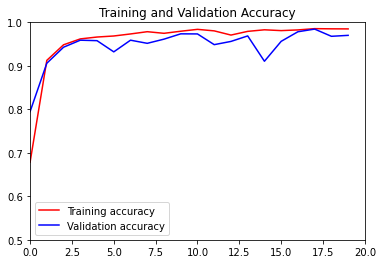

<Figure size 432x288 with 0 Axes>

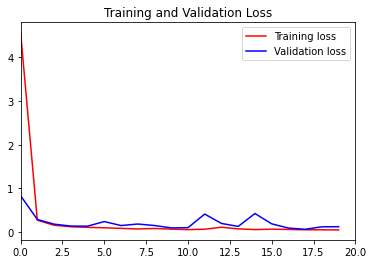

<Figure size 432x288 with 0 Axes>

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.ylim(0.5, 1)
plt.xlim(0, 20)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

#plt.ylim(0, 4)
plt.xlim(0, 20)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

# **Save Model**

In [0]:
export_path = "/content/saved_model"

try: 
  os.mkdir(export_path) 
except OSError as error: 
  print(error) 

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print('\nSaved model:')
!ls -l {export_path}

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/saved_model/assets

Saved model:
total 10084
drwxr-xr-x 2 root root     4096 May 31 03:50 assets
-rw-r--r-- 1 root root 10317075 May 31 03:50 saved_model.pb
drwxr-xr-x 2 root root     4096 May 31 03:50 variables


# **Download Saved Model**

In [0]:
!zip -r /content/saved_model.zip /content/saved_model

  adding: content/saved_model/ (stored 0%)
  adding: content/saved_model/saved_model.pb (deflated 93%)
  adding: content/saved_model/assets/ (stored 0%)
  adding: content/saved_model/variables/ (stored 0%)
  adding: content/saved_model/variables/variables.index (deflated 79%)
  adding: content/saved_model/variables/variables.data-00000-of-00002 (deflated 83%)
  adding: content/saved_model/variables/variables.data-00001-of-00002 (deflated 33%)


In [0]:
files.download("/content/saved_model.zip")

# **Upload Saved Model**

In [0]:
uploaded = files.upload()
!unzip /content/saved_model.zip
model = tf.keras.models.load_model('/content/saved_model/')
model.summary()

# **Try Classification**

In [0]:
from google.colab import files

file = files.upload()

img = image.load_img(list(file.keys())[0], target_size=(256, 256))
img = image.img_to_array(img)
img = img.reshape(1, 256, 256, 3)
img = img.astype('float32')
img = img / 255.0
result = model.predict(img)
result = list(result[0]).index(max(result[0]))

print("\n\nResult :")

if result == 0:
  print("Bacterial Spot")
elif result == 1:
  print("Early Blight")
elif result == 2:
  print("Late Blight")
elif result == 3:
  print("Leaf Mold")
elif result == 4:
  print("Septoria Leaf Spot")
elif result == 5:
  print("Spider Mites")
elif result == 6:
  print("Target Spot")
elif result == 7:
  print("Yellow Leaf Curl Virus")
elif result == 8:
  print("Mosaic Virus")
else:
  print("Healthy")

Saving datasets_259770_544347_New Plant Diseases Dataset(Augmented)_train_Tomato___healthy_00bce074-967b-4d50-967a-31fdaa35e688___RS_HL 0223.jpg to datasets_259770_544347_New Plant Diseases Dataset(Augmented)_train_Tomato___healthy_00bce074-967b-4d50-967a-31fdaa35e688___RS_HL 0223.jpg


Result :
Healthy
